<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data description</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Splitting-dataset-" data-toc-modified-id="Splitting-dataset--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Splitting dataset <a class="anchor" id="samples" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Building-models-" data-toc-modified-id="Building-models--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building models <a class="anchor" id="models" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Decision tree</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Model-testing-" data-toc-modified-id="Model-testing--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model testing <a class="anchor" id="test" rel="nofollow"></a></a></span></li><li><span><a href="#Summary-" data-toc-modified-id="Summary--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary <a class="anchor" id="summary" rel="nofollow"></a></a></span></li></ul></div>

# Tariff recommendation for a telecommunications company

# Project description <a class="anchor" id="description"></a>

**Brief information:** a mobile operator plans to analyze customer behavior and offer users of archived tariffs a range of new tariffs: Smart or Ultra.

**Objective:** develop a classification model that determines the appropriate tariff for a customer based on their behavior.

**Tasks:** research and analyze the quality of different classification models and select one with the highest accuracy metrics on validation and test sets (threshold is 75%).

## Data description

The dataset contains 1 table with the following columns:
* `сalls` — number of calls made,
* `minutes` — total call time in minutes,
* `messages` — number of sms messages,
* `mb_used` — traffic spent in Mb,
* `is_ultra` — Which tariff the client used during the month («Ultra» — 1, «Smart» — 0).

### EDA

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
# reading file
df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [3]:
# showing first rows
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


It is not necessary to change the column types or data pre-processing for the current task.

Determining the most appropriate tariff for a customer (smart or ultra) is a binary classification problem.

The target variable is the column `is_ultra` (if the customer uses the tariff "ultra" - 1; "smart" - 0). The other columns are features that characterize the volume of services consumed by the client (Internet traffic, number of messages, and call duration in minutes).

Before fitting the models, we'll split our dataset into training, validation, and test sets in a 3:1:1 ratio. In our research, we'll consider a decision tree, random forest, and logistic regression.

### Conclusions

* **It is not necessary to change the column types or data pre-processing for the current task;**

* **Determining the most appropriate tariff for a customer (Smart or Ultra) is a binary classification problem. This means that we need to predict a tariff usage for the customer (Ultra - 1, Smart - 0);**

* **The target variable is the `is_ultra` column (if the client uses the "ultra" tariff - 1; "smart" - 0). The other columns are features that characterize the volume of services consumed by the customer. Before fitting the models, we'll split our dataset into training, validation, and test sets in a ratio of 3:1:1. In our research, we'll consider a decision tree, random forest, and logistic regression.**

## Splitting dataset <a class="anchor" id="samples"></a>

We will divide the initial data into training, validation and test samples in the ratio of 60:20:20. We will solve this problem in two stages: in the first stage, we will select the training set (60%) and the rest (40%). In the second stage, the remaining part will be divided in half: into validation (20%) and test sets (20%).

But first, let's create variables to store the features and the target feature. Given the uneven distribution between the tariffs, we use a stratified division of the samples to maintain this proportion in them.

In [5]:
df.groupby('is_ultra')['is_ultra'].count()

is_ultra
0    2229
1     985
Name: is_ultra, dtype: int64

In [6]:
# creating features and target variables
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [7]:
# splitting dataset into training (60%) and remaining sets (40%)
features_train, features_remaining, target_train, target_remaining = (train_test_split(features, 
                                                                                       target, 
                                                                                       train_size=0.6, 
                                                                                       random_state=12345,
                                                                                       stratify=target))

In [8]:
# splitting remaining set (40%) into validation (20%) and test (20%) sets
features_valid, features_test, target_valid, target_test = (train_test_split(features_remaining, 
                                                                             target_remaining, 
                                                                             test_size=0.5, 
                                                                             random_state=12345,
                                                                             stratify=target_remaining))

In [9]:
# check
print(f'Number of rows in the training set: {features_train.shape[0]} и {target_train.shape[0]}')
print(f'Number of rows in the remaingin set: {features_remaining.shape[0]} и {target_remaining.shape[0]}')
print(f'Number of orws in the validation set: {features_valid.shape[0]} и {target_valid.shape[0]}')
print(f'Number of rows in the test set: {features_test.shape[0]} и {target_test.shape[0]}')

Number of rows in the training set: 1928 и 1928
Number of rows in the remaingin set: 1286 и 1286
Number of orws in the validation set: 643 и 643
Number of rows in the test set: 643 и 643


In [10]:
if features_train.shape[0] + features_valid.shape[0] + features_test.shape[0] == df.shape[0]:
    print('Sum of rows is identical in three sets')
else:
    print('Sum of rows is not identical in three sets')

Sum of rows is identical in three sets


In [11]:
# checking class balance
target_train.value_counts()

0    1337
1     591
Name: is_ultra, dtype: int64

In [12]:
# checking class balance
target_valid.value_counts()

0    446
1    197
Name: is_ultra, dtype: int64

In [13]:
# checking class balance
target_test.value_counts()

0    446
1    197
Name: is_ultra, dtype: int64

### Conclusions

* **The initial dataset was divided into training, validation and test sets in a ratio of 60%:20%:20%. Given the unbalanced classes between the target variables, the dataset was split in a stratified manner;**
* **Next, we'll build tariff prediction models.**

## Building models <a class="anchor" id="models"></a>

To solve the binary classification problem, let's consider several models: decision tree, random forest, and logistic regression. Presumably, the best model would be logistic regression due to the small number of features.

### Decision tree

In [14]:
%%time
best_model_tree = None
best_result_tree = 0
best_depth = 0
best_leaf = 0

depth_list = []
sample_list = []
accuracy_train_list = [] 
accuracy_valid_list = [] 

for depth in range(1, 20):
    for sample in range(1, 11, 1):
        model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=sample)
        model_tree.fit(features_train, target_train)
        accuracy_train = accuracy_score(target_train, model_tree.predict(features_train))
        predictions_tree = model_tree.predict(features_valid) 
        result_tree = accuracy_score(target_valid, predictions_tree)
        depth_list.append(depth)
        sample_list.append(sample)
        accuracy_train_list.append(accuracy_train)
        accuracy_valid_list.append(result_tree)
        if result_tree > best_result_tree:
            best_model_tree = model_tree
            best_result_tree = result_tree
            best_depth = depth
            best_leaf = sample

CPU times: total: 1.25 s
Wall time: 1.29 s


In [15]:
print("Best model accuracy on the validation set:", best_result_tree)
print("Best model depth:", best_depth)
print("Minimum number of observations in a leaf:", best_leaf)

Best model accuracy on the validation set: 0.80248833592535
Best model depth: 7
Minimum number of observations in a leaf: 9


Let's create heatmaps to check the dependence of model accuracy on tree depth and the minimum number of samples in a leaf. We'll also plot a decision tree with the highest accuracy on the validation set.

In [16]:
# df with depths, number of samples, and accuracies
heatmap = (pd.DataFrame
           (list
            (zip
             (depth_list, sample_list, accuracy_train_list, accuracy_valid_list)), 
            columns=['depth', 'sample', 'train_accuracy', 'valid_accuracy']))

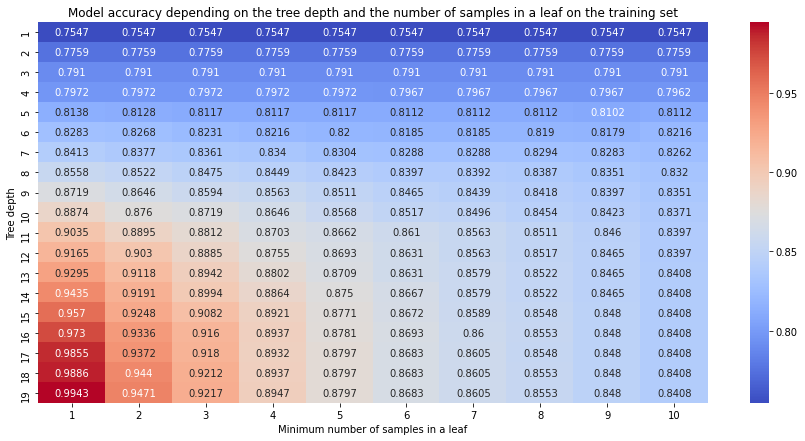

In [17]:
plt.figure(figsize=(15,7))
plt.title('Model accuracy depending on the tree depth and the number of samples in a leaf on the training set')
s = sns.heatmap(heatmap.pivot('depth', 'sample', 'train_accuracy'), annot = True, fmt='.4g', cmap= 'coolwarm')
s.set_xlabel('Minimum number of samples in a leaf', fontsize=10)
s.set_ylabel('Tree depth', fontsize=10);

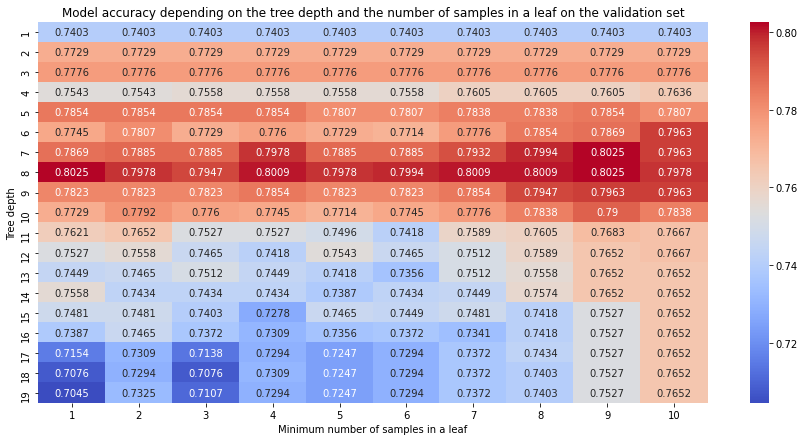

In [18]:
plt.figure(figsize=(15,7))
plt.title('Model accuracy depending on the tree depth and the number of samples in a leaf on the validation set')
s = sns.heatmap(heatmap.pivot('depth', 'sample', 'valid_accuracy'), annot = True, fmt='.4g', cmap= 'coolwarm')
s.set_xlabel('Minimum number of samples in a leaf', fontsize=10)
s.set_ylabel('Tree depth', fontsize=10);

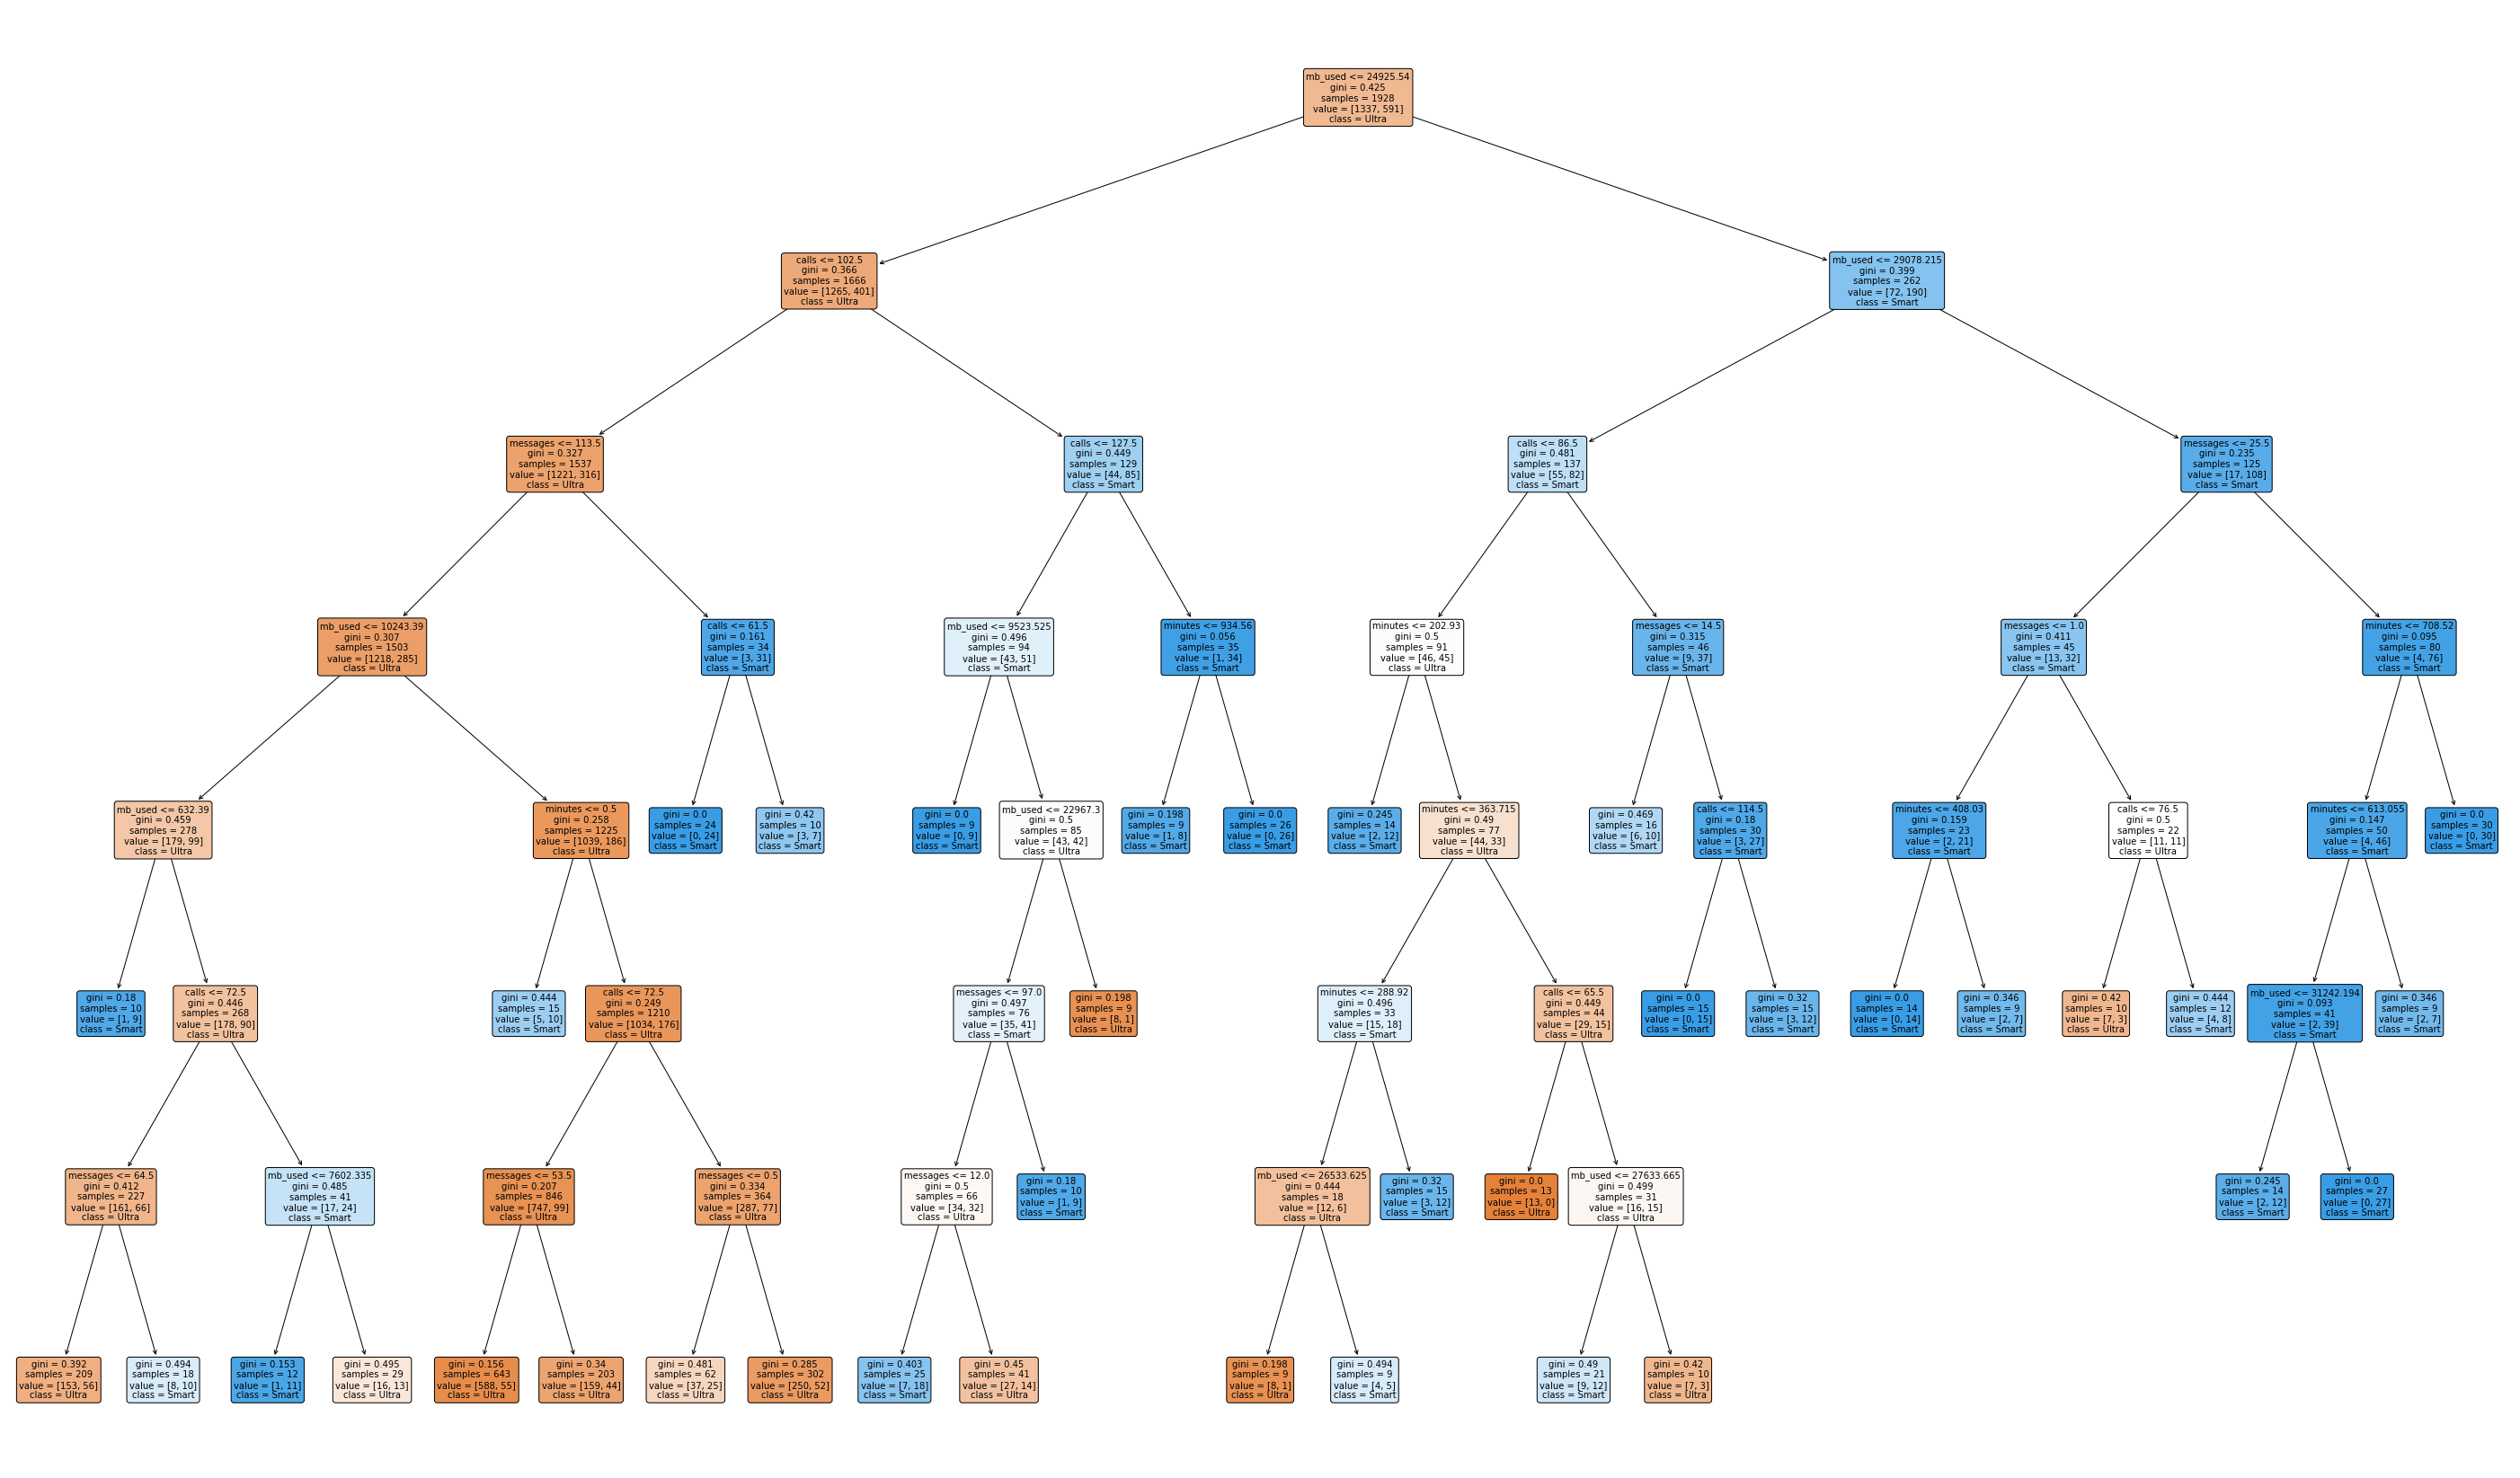

In [19]:
# decision tree plot with the highest accuracy on the validation set
plt.figure(figsize=(50, 30))
tree.plot_tree(best_model_tree, feature_names=features_train.columns, class_names = ['Ultra', 'Smart'], fontsize=10, filled=True, rounded=True)
plt.show()

Thus, the decision tree depth that shows the best quality on the validation set is 7 nodes with a minimum number of samples in a leaf equal to 9. At the same time, the accuracy of this model is ~80.3%. Based on the heat map, it can be seen that a deeper decision tree has high results on the training set, but is prone to overfitting and shows less accurate results on the validation set. However, the depth of this tree can make it difficult to interpret the results.

### Random forest

To improve the prediction accuracy of the random forest, we'll tune the following most optimal hyperparameters: number of estimators, maximum depth, and minimum number of observations in a leaf (to minimize the prediction error on the validation and test sets - a leaf containing only 1 observation seems to be too small).

In [20]:
%%time
best_model_forest = None
best_result_forest = 0
best_est = 0
best_depth_forest = 0
best_sample_leaf = 0

for est in range(10, 200, 10):
    for depth in range (1, 11):
        for sample in range(2, 11, 2):
            model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_leaf=sample, n_jobs=-1) # модель случайного леса
            model_forest.fit(features_train, target_train) 
            predictions_forest = model_forest.predict(features_valid) 
            result_forest = accuracy_score(target_valid, predictions_forest) 
            if result_forest > best_result_forest:
                best_model_forest = model_forest
                best_result_forest = result_forest
                best_est = est
                best_depth_forest = depth
                best_sample_leaf = sample

print("Best model accuracy on the validation set:", best_result_forest)
print("Number of estimators:", best_est)
print("Best model depth:", best_depth_forest)
print("Minimum number of samples in a leaf:", best_sample_leaf)

Best model accuracy on the validation set: 0.8258164852255054
Number of estimators: 60
Best model depth: 10
Minimum number of samples in a leaf: 6
CPU times: total: 1min 4s
Wall time: 2min 11s


Therefore, the random forest depth that shows the best model quality contains 10 decision nodes. The accuracy of this model is ~82.6%. The number of estimators is 60 with a minimum number of samples in a leaf of 6. Deeper random forest hyperparameters lead to overfitting and show less accurate results on the validation set.

### Logistic regression

In [21]:
model_regr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model_regr.fit(features_train, target_train)
predictions_regr = model_regr.predict(features_valid)
print('Logistic regression accuracy:', accuracy_score(target_valid, predictions_regr))

Logistic regression accuracy: 0.7387247278382582


The previous assumption about the accuracy of logistic regression is incorrect. Of all the models, logistic regression has the lowest accuracy on the validation set - 73.9%. This is probably due to the non-linear relationship between features and target.

### Conclusions

**To predict the most appropriate tariff for a customer, a telecom company should use a random forest model with the following hyperparameters:** 
* **Number of estimators: 60**
* **Maximum depth: 10**
* **Minimum number of samples in a leaf: 6**

## Model testing <a class="anchor" id="test"></a>

Let's check the accuracy of our built model on the test set.

In [22]:
predictions_test = best_model_forest.predict(features_test)
print('Random forest accuracy on the test set:', accuracy_score(target_test, predictions_test))

Random forest accuracy on the test set: 0.8133748055987559


Accuracy is 81.3%.

## Summary <a class="anchor" id="summary"></a>

* **The highest accuracy in predicting a suitable tariff for a client has a random forest model with the following hyperparameters: the number of estimators - 60, the maximum depth - 10, and the minimum number of samples in a sheet - 6. The accuracy on the test set is 81.3%;**
* **With this model, the marketing department will be able to determine appropriate plans for new and existing customers based on the analysis of the customer's historical data. In the previous project, the Ultra plan was found to have a higher monthly fee. Therefore, the model also has the potential to maximize revenue per customer.**